# 내용기반 추천 시스템

In [426]:
import pandas as pd

In [440]:
metadata = pd.read_csv('boardgamegeek-reviews/games_detailed_info.csv')

In [441]:
metadata.head()

,Unnamed: 0,Abstract Game Rank,Accessory Rank,Amiga Rank,Arcade Rank,Atari ST Rank,Board Game Rank,Children's Game Rank,Commodore 64 Rank,Customizable Rank,...,suggested_language_dependence,suggested_num_players,suggested_playerage,thumbnail,trading,type,usersrated,wanting,wishing,yearpublished
0,0,NaN,NaN,NaN,NaN,NaN,327,NaN,NaN,NaN,...,"[OrderedDict([('@level', '36'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/g8LvJsd...,1685,boardgame,85332,453,4729,1995
1,1,NaN,NaN,NaN,NaN,NaN,151,NaN,NaN,NaN,...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/kqE4YJS...,1477,boardgame,85052,498,5403,2000
2,2,NaN,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/HEKrtpT...,1977,boardgame,83486,614,7655,2008
3,3,NaN,NaN,NaN,NaN,NaN,45,NaN,NaN,NaN,...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/Grz-qM9...,1162,boardgame,69132,1029,9464,2010
4,4,NaN,NaN,NaN,NaN,NaN,76,NaN,NaN,NaN,...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/iPlTR5c...,1806,boardgame,68284,571,6703,2008


In [442]:
C = metadata['average'].mean()
print(C)

6.349483988747583


In [443]:
m = metadata['usersrated'].quantile(0.9)
print(m)

1380.6000000000022


In [444]:
q_games = metadata.copy().loc[metadata['usersrated']>=m]
q_games.shape

(1707, 56)

In [445]:
def WR(x, m=m, C=C):
    v = x['usersrated']
    R = x['average']
    return(v/(v+m)*R) + (m/(m+v)*C)

In [446]:
metadata['score'] = metadata.apply(WR, axis = 1)

In [447]:
metadata['score'].head()

0    7.177779
1    7.408854
2    7.617029
3    7.753148
4    7.619032
Name: score, dtype: float64

In [448]:
col = ['primary','average','usersrated','score']
rs_original = metadata.sort_values('average', ascending = False)[col]
rs_new = metadata.sort_values('usersrated', ascending = False)[col]

In [449]:
rs_original.head()

,primary,average,usersrated,score
15890,Limbo: Eternal War,9.59714,35,6.429781
15968,Animator vs Animation,9.58823,34,6.427327
11309,TerroriXico,9.42857,70,6.498068
9369,Arena: The Contest,9.41089,101,6.558179
12845,Court of the Dead: Mourners Call,9.32426,54,6.461458


In [450]:
rs_new.head()

,primary,average,usersrated,score
0,Catan,7.19118,85332,7.177779
1,Carcassonne,7.42605,85052,7.408854
2,Pandemic,7.63799,83486,7.617029
3,7 Wonders,7.78118,69132,7.753148
4,Dominion,7.64470,68284,7.619032


In [451]:
metadata['description'][0]

"In Catan (formerly The Settlers of Catan), players try to be the dominant force on the island of Catan by building settlements, cities, and roads. On each turn dice are rolled to determine what resources the island produces. Players collect these resources (cards)&mdash;wood, grain, brick, sheep, or stone&mdash;to build up their civilizations to get to 10 victory points and win the game.&#10;&#10;Setup includes randomly placing large hexagonal tiles (each showing a resource or the desert) in a honeycomb shape and surrounding them with water tiles, some of which contain ports of exchange. Number disks, which will correspond to die rolls (two 6-sided dice are used), are placed on each resource tile. Each player is given two settlements (think: houses) and roads (sticks) which are, in turn, placed on intersections and borders of the resource tiles. Players collect a hand of resource cards based on which hex tiles their last-placed house is adjacent to. A robber pawn is placed on the dese

In [453]:
metadata['description'].head()

0    In Catan (formerly The Settlers of Catan), pla...
1    Carcassonne is a tile-placement game in which ...
2    In Pandemic, several virulent diseases have br...
3    You are the leader of one of the 7 great citie...
4    (from the back of the box:)&#10;&#10;&quot;You...
Name: description, dtype: object

In [454]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [455]:
tfidf = TfidfVectorizer(stop_words = 'english')

In [457]:
metadata.description = metadata.description.fillna('')

In [458]:
tfidf_matrix = tfidf.fit_transform(metadata.description)
tfidf_matrix.shape

(17063, 61013)

In [459]:
from sklearn.metrics.pairwise import linear_kernel

In [460]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [475]:
metadata['primary'].head()

0          Catan
1    Carcassonne
2       Pandemic
3      7 Wonders
4       Dominion
Name: primary, dtype: object

In [476]:
indices = pd.Series(metadata.index, index = metadata['primary']).drop_duplicates()

In [486]:
def rs(primary, n=20, sim=cosine_sim):
    idx = indices[primary]
    sim_score = list(enumerate(cosine_sim[idx]))
    sim_score = sorted(sim_score, key = lambda x: x[1], reverse = True)
    sim_score = sim_score[1:(n+1)]
    game_index = [i[0] for i in sim_score]
    return metadata.primary.iloc[game_index]

In [487]:
cosine_sim[3]

array([0.12102405, 0.02744314, 0.08475298, ..., 0.01909818, 0.0364033 ,
       0.02408288])

In [488]:
tfidf_matrix

<17063x61013 sparse matrix of type '<class 'numpy.float64'>'
	with 1238011 stored elements in Compressed Sparse Row format>

In [490]:
rs('7 Wonders')

18                                      7 Wonders Duel
7221                                       S-Evolution
133      Through the Ages: A New Story of Civilization
9721                                           Ohanami
652                             Nations: The Dice Game
16921                                         Zwickern
117          Through the Ages: A Story of Civilization
14101                                       Immortal 8
8241                                        Monumental
3444                                        Barbarossa
2467                                     Zany Penguins
1123                                    Tower of Babel
15636                                     GUAR Fantasy
14392                                    The Bark Side
2674                                        Artificium
763                                             Linko!
2818                                      Guns & Steel
4296                                   Phase 10 Master
2417      

# 딥러닝 기반 추천 시스템

In [11]:
import surprise
import pandas as pd
import numpy as np

In [418]:
game_rate = pd.read_csv('boardgamegeek-reviews/2019-05-02.csv')

In [4]:
review = pd.read_csv('boardgamegeek-reviews/bgg-13m-reviews.csv')

In [5]:
detail = pd.read_csv('boardgamegeek-reviews/games_detailed_info.csv')

In [7]:
rate.head()

,ID,Name,Year,Rank,Average,Bayes average,Users rated,URL,Thumbnail
0,174430,Gloomhaven,2017,1,8.90,8.611,24574,/boardgame/174430/gloomhaven,https://cf.geekdo-images.com/micro/img/8JYMPXd...
1,161936,Pandemic Legacy: Season 1,2015,2,8.64,8.489,30921,/boardgame/161936/pandemic-legacy-season-1,https://cf.geekdo-images.com/micro/img/KbAKyhb...
2,182028,Through the Ages: A New Story of Civilization,2015,3,8.53,8.258,15551,/boardgame/182028/through-ages-new-story-civil...,https://cf.geekdo-images.com/micro/img/APvZ_BY...
3,167791,Terraforming Mars,2016,4,8.40,8.242,38331,/boardgame/167791/terraforming-mars,https://cf.geekdo-images.com/micro/img/71v8jF5...
4,12333,Twilight Struggle,2005,5,8.33,8.175,34268,/boardgame/12333/twilight-struggle,https://cf.geekdo-images.com/micro/img/uStZr7_...


In [8]:
review.head()

,Unnamed: 0,user,rating,comment,ID,name
0,0,sidehacker,10.0,NaN,13,Catan
1,1,Varthlokkur,10.0,NaN,13,Catan
2,2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",13,Catan
3,3,cypar7,10.0,"I know it says how many plays, but many, many ...",13,Catan
4,4,ssmooth,10.0,NaN,13,Catan


In [375]:
review.shape

(13170073, 6)

In [9]:
detail.head()

,Unnamed: 0,Abstract Game Rank,Accessory Rank,Amiga Rank,Arcade Rank,Atari ST Rank,Board Game Rank,Children's Game Rank,Commodore 64 Rank,Customizable Rank,...,suggested_language_dependence,suggested_num_players,suggested_playerage,thumbnail,trading,type,usersrated,wanting,wishing,yearpublished
0,0,NaN,NaN,NaN,NaN,NaN,327,NaN,NaN,NaN,...,"[OrderedDict([('@level', '36'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/g8LvJsd...,1685,boardgame,85332,453,4729,1995
1,1,NaN,NaN,NaN,NaN,NaN,151,NaN,NaN,NaN,...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/kqE4YJS...,1477,boardgame,85052,498,5403,2000
2,2,NaN,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/HEKrtpT...,1977,boardgame,83486,614,7655,2008
3,3,NaN,NaN,NaN,NaN,NaN,45,NaN,NaN,NaN,...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/Grz-qM9...,1162,boardgame,69132,1029,9464,2010
4,4,NaN,NaN,NaN,NaN,NaN,76,NaN,NaN,NaN,...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/iPlTR5c...,1806,boardgame,68284,571,6703,2008


# Surprise를 통한 분석

In [52]:
df_rt = pd.DataFrame(rate, columns = ['Name','Average','Users rated'])

In [53]:
df_rt.head()

,Name,Average,Users rated
0,Gloomhaven,8.90,24574
1,Pandemic Legacy: Season 1,8.64,30921
2,Through the Ages: A New Story of Civilization,8.53,15551
3,Terraforming Mars,8.40,38331
4,Twilight Struggle,8.33,34268


In [71]:
df_rv = pd.DataFrame(review, columns = ['user','rating','name'])

In [56]:
df_rv.head()

,user,rating,name
11831669,mjg821,7.0,How to Rob a Bank
6485728,Kermeur,8.0,Among the Stars
4290475,surlyduff,7.5,Zooloretto
10219887,Tolkana,5.0,Augsburg 1520
9076213,william4192,5.0,Oasis


In [144]:
df_rv_count = pd.value_counts(df_rv['user'].values, sort=True)

In [155]:
count = pd.DataFrame({'user':df_rv_count.index, 'count':df_rv_count.values})

In [156]:
count.head()

,user,count
0,leffe dubbel,5939
1,Doel,4485
2,TomVasel,4258
3,Hessu68,4065
4,Walt Mulder,3868


In [382]:
count.shape

(289913, 2)

In [387]:
c = 0
r = 200
for i in range(r):
    a = np.shape(np.where(count['count'] == i+1))[1]
    c = a+c
u = np.shape(count)[0] - c
u, c

(13759, 276154)

In [388]:
count.iloc[199]

user     Torsten
count       1245
Name: 199, dtype: object

In [393]:
X = count['user'][0:200]
Y = count['count'][0:200]

Text(0.5, 1.0, 'review count')

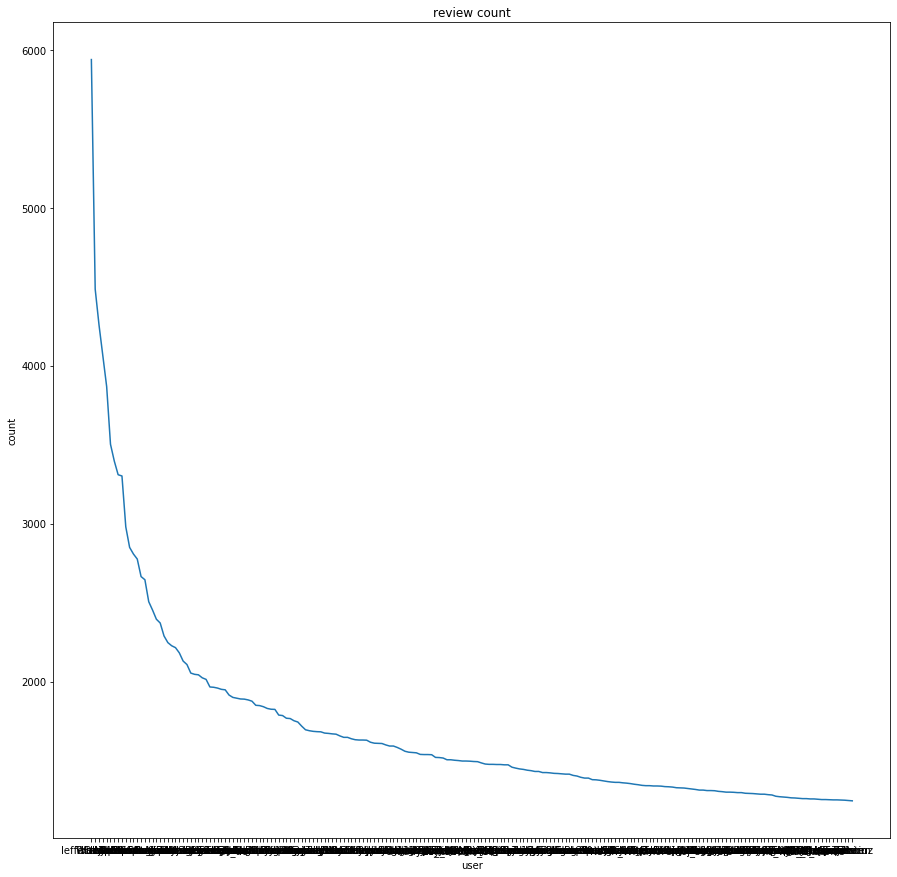

In [394]:
plt.figure(figsize = (15,15))
plt.plot(X, Y)
plt.grid(False)
plt.xlabel('user')
plt.ylabel('count')
plt.title('review count')

In [395]:
df_rv_new = pd.merge(df_rv,X)

In [396]:
df_rv_new.head()

,user,rating,name
0,cypar7,10.0,Catan
1,cypar7,8.0,Carcassonne
2,cypar7,8.0,Pandemic
3,cypar7,8.0,7 Wonders
4,cypar7,6.0,Dominion


In [397]:
df_rv_new.shape

(339300, 3)

In [398]:
dt_rv_new = df_rv_new.set_index(['user','name']).unstack()

In [399]:
dt_rv_new.iloc[0:10, 0:10].fillna('')

rating  \
name           "La Garde recule!"   
user                                
Alan How                            
AnttiT                              
Arkeo                               
Baartoszz                           
Bagherra                            
Bankler                             
Bernhard N.                         
BeyondMonopoly                      
Bobby4th                            
Boltana                             

                                                                                             \
name           "Oh My God! There's An Axe In My Head." The Game of International Diplomacy    
user                                                                                          
Alan How                                                                                      
AnttiT                                                                                        
Arkeo                                                                                         
Baartoszz                                                                                     
Bagherra                                                                                      
Bankler                                                                                       
Bernhard N.                                                                                   
BeyondMonopoly                                                                                
Bobby4th                                                                                      
Boltana                                                                                       

                                                              \
name           "Scratch One Flat Top!" "Tarleton's Quarter!"   
user                                                           
Alan How                                                       
AnttiT                                                         
Arkeo                                                          
Baartoszz                                                      
Bagherra                                                       
Bankler                                                        
Bernhard N.                                                    
BeyondMonopoly                                                 
Bobby4th                                                       
Boltana                                                        

                                                                        \
name           '65: Squad-Level Combat in the Jungles of Vietnam *Star   
user                                                                     
Alan How                                                                 
AnttiT                                                                   
Arkeo                                                                    
Baartoszz                                                                
Bagherra                                                                 
Bankler                                                                  
Bernhard N.                                                              
BeyondMonopoly                                                       8   
Bobby4th                                                                 
Boltana                                                                  

                                                                         \
name           ...and then, we held hands. ...und tschüss! .hack//ENEMY   
user                                                                      
Alan How                                                                  
AnttiT                                                                    
Arkeo                                                                     
Baartoszz                                                      

In [400]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Rate Matrix')

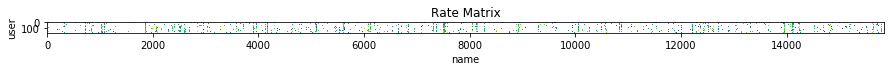

In [401]:
plt.figure(figsize = (15,15))
plt.imshow(dt_rv_new)
plt.grid(False)
plt.xlabel('name')
plt.ylabel('user')
plt.title('Rate Matrix')

In [402]:
from surprise import Reader
from surprise import dataset


reader = Reader(line_format='user item rating', rating_scale=(1, 5))

# Also, a dummy Dataset class
class MyDataset(dataset.DatasetAutoFolds):

    def __init__(self, df, reader):

        self.raw_ratings = [(uid, iid, r, None) for (uid, iid, r) in
                            zip(df_rv_new['user'], df_rv_new['name'], df_rv_new['rating'])]
        self.reader=reader

data = MyDataset(df_rv_new, reader)

In [403]:
from surprise.model_selection import KFold

# 베이스 라인 모형 : ALS

In [404]:
bsl_param = {'method':'als', 'n_epochs':5, 'reg_u':12, 'reg_l':5}
model = surprise.BaselineOnly(bsl_options = bsl_param)

In [405]:
acc = np.zeros(3)
cv = KFold(3)
for i, (trainset, testset) in enumerate(cv.split(data)):
    model.fit(trainset)
    pred = model.test(testset)
    acc[i] = surprise.accuracy.rmse(pred, verbose = True)
acc.mean()

Estimating biases using als...
RMSE: 2.0349
Estimating biases using als...
RMSE: 2.0343
Estimating biases using als...
RMSE: 2.0396


2.036252048627898

In [406]:
from surprise.model_selection import cross_validate
cross_validate(model, data)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([2.04322096, 2.03627254, 2.02821546, 2.03393971, 2.03628744]),
 'test_mae': array([1.69983978, 1.69878406, 1.6876701 , 1.69531988, 1.69879832]),
 'fit_time': (0.5166089534759521,
  0.6074130535125732,
  0.5874295234680176,
  0.5624971389770508,
  0.581427812576294),
 'test_time': (0.2693021297454834,
  0.25831055641174316,
  1.211771011352539,
  0.26631712913513184,
  0.262300968170166)}

# 베이스 라인 모형 : SGD

In [407]:
bsl_param = {'method':'sgd', 'n_epochs':5, 'reg':0.02, 'learning_rate':0.005}
model = surprise.BaselineOnly(bsl_options = bsl_param)

In [408]:
acc = np.zeros(3)
cv = KFold(3)
for i, (trainset, testset) in enumerate(cv.split(data)):
    model.fit(trainset)
    pred = model.test(testset)
    acc[i] = surprise.accuracy.rmse(pred, verbose = True)
acc.mean()

Estimating biases using sgd...
RMSE: 2.0403
Estimating biases using sgd...
RMSE: 2.0386
Estimating biases using sgd...
RMSE: 2.0392


2.039345123155828

In [409]:
from surprise.model_selection import cross_validate
cross_validate(model, data)

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


{'test_rmse': array([2.0383271 , 2.03931604, 2.04060498, 2.02852499, 2.04670251]),
 'test_mae': array([1.69460291, 1.70214761, 1.7029315 , 1.69018983, 1.70377803]),
 'fit_time': (0.3700239658355713,
  0.44780898094177246,
  0.4508175849914551,
  0.4530069828033447,
  0.4591944217681885),
 'test_time': (1.1938002109527588,
  0.25832247734069824,
  0.25829291343688965,
  0.25729942321777344,
  0.26329874992370605)}

# 이웃 기반 모형 : MSD

In [410]:
sim_options = {'name': 'msd'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


1.7049351459356585

# 이웃 기반 모형 : Cosine

In [411]:
sim_options = {'name': 'cosine'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


1.7082812992252066

# 이웃 기반 모형 : Pearson

In [412]:
sim_options = {'name': 'pearson'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


1.7073664932671115

# 이웃 기반 모형 : Pearson-Baseline

In [413]:
sim_options = {'name': 'pearson_baseline'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


1.7117925319345613

In [414]:
sim_options = {'name': 'pearson_baseline'}
algo = surprise.KNNWithMeans(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


1.7015334732543823

In [415]:
sim_options = {'name': 'pearson_baseline'}
algo = surprise.KNNBaseline(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


1.7000620242203266

# Latent Factor 모형 : SVD

In [416]:
%%time
algo = surprise.SVD(n_factors=100)
cross_validate(algo, data)["test_mae"].mean()

Wall time: 1min 42s


1.6959303142045132

# Latent Factor 모형 : NMF

In [417]:
%%time
algo = surprise.NMF(n_factors=100)
cross_validate(algo, data)["test_mae"].mean()

Wall time: 4min 32s


1.7035452366356174

# fastai를 이용한 추천 시스템

In [492]:
import pandas as pd
import pickle
import numpy as np
from fastai.collab import *
from pprint import pprint
import matplotlib.pyplot as plt
import umap
from scipy import stats
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

DistributionNotFound: The 'fastprogress>=0.1.19' distribution was not found and is required by the application

In [419]:
game_rate.describe()
game_rate.sort_values('Users rated',ascending=False,inplace=True)
game_rate.rename(index=str, columns={"Bayes average": "Geekscore",'Name':'name'}, inplace=True)

In [421]:
games_by_all_users = review.groupby('name')['rating'].agg(['mean','count']).sort_values('mean',ascending=False)
games_by_all_users['rank']=games_by_all_users.reset_index().index+1
print(len(games_by_all_users))

16735


In [422]:
data_fa = CollabDataBunch.from_df(reviews, user_name='user',item_name='name',rating_name='rating',bs=100000, seed = 42)
data_fa.show_batch()

NameError: name 'CollabDataBunch' is not defined